In [1]:
import os
import cv2
import shutil
import pandas as pd
from shutil import move 
from subprocess import call 
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline 

In [3]:
# Directory configuration
base_dir = os.getcwd()

# Generating the paths
extraction_point = os.path.join(base_dir, 'data','extracted_raw')
processed_data_path = os.path.join(base_dir, 'data','processed')

# Generating the directories
os.makedirs(extraction_point)
os.makedirs(processed_data_path)

In [4]:
# Downloading the data from git hub
dataset_url = "http://aisdatasets.informatik.uni-freiburg.de/" \
              "freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz"


print("Downloading dataset.")
urlretrieve(dataset_url, "../freiburg_groceries_dataset.tar.gz")
print("Extracting dataset.")
call(["tar", "-xf", "../freiburg_groceries_dataset.tar.gz", "-C", extraction_point])
os.remove("../freiburg_groceries_dataset.tar.gz")
print("Done.")

Extracting dataset.
Done.


In [9]:
os.listdir('data/extracted_raw/images/PASTA/PASTA0025.png')

['PASTA0144.png',
 'PASTA0105.png',
 'PASTA0073.png',
 'PASTA0053.png',
 'PASTA0008.png',
 'PASTA0112.png',
 'PASTA0168.png',
 'PASTA0024.png',
 'PASTA0110.png',
 'PASTA0059.png',
 'PASTA0157.png',
 'PASTA0013.png',
 'PASTA0039.png',
 'PASTA0111.png',
 'PASTA0086.png',
 'PASTA0010.png',
 'PASTA0034.png',
 'PASTA0077.png',
 'PASTA0171.png',
 'PASTA0121.png',
 'PASTA0125.png',
 'PASTA0016.png',
 'PASTA0015.png',
 'PASTA0021.png',
 'PASTA0048.png',
 'PASTA0036.png',
 'PASTA0070.png',
 'PASTA0131.png',
 'PASTA0027.png',
 'PASTA0000.png',
 'PASTA0078.png',
 'PASTA0093.png',
 'PASTA0076.png',
 'PASTA0170.png',
 'PASTA0129.png',
 'PASTA0164.png',
 'PASTA0001.png',
 'PASTA0136.png',
 'PASTA0085.png',
 'PASTA0060.png',
 'PASTA0084.png',
 'PASTA0061.png',
 'PASTA0102.png',
 'PASTA0058.png',
 'PASTA0056.png',
 'PASTA0045.png',
 'PASTA0161.png',
 'PASTA0150.png',
 'PASTA0106.png',
 'PASTA0057.png',
 'PASTA0067.png',
 'PASTA0151.png',
 'PASTA0068.png',
 'PASTA0108.png',
 'PASTA0002.png',
 'PASTA013

In [23]:
image_path = 'data/extracted_raw/images/PASTA/PASTA0025.png'
image_matrix = cv2.imread(image_path)
#image_matrix.shape
image_matrix

In [25]:
print(image_matrix)

None


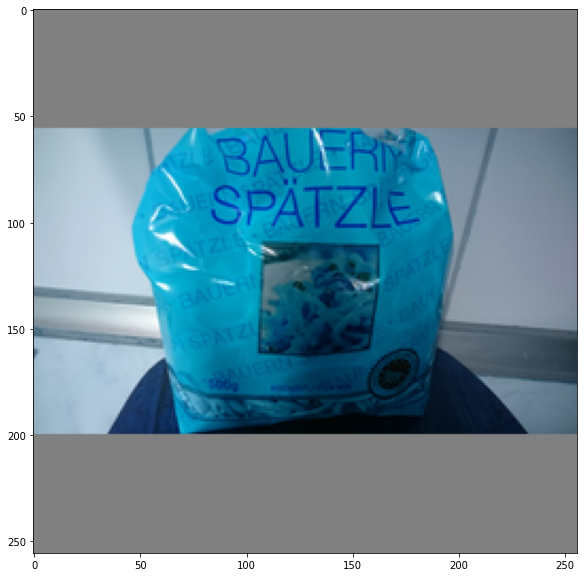

In [12]:
plt.figure(figsize=(24,10))
plt.imshow(image_matrix)
#plt.show()

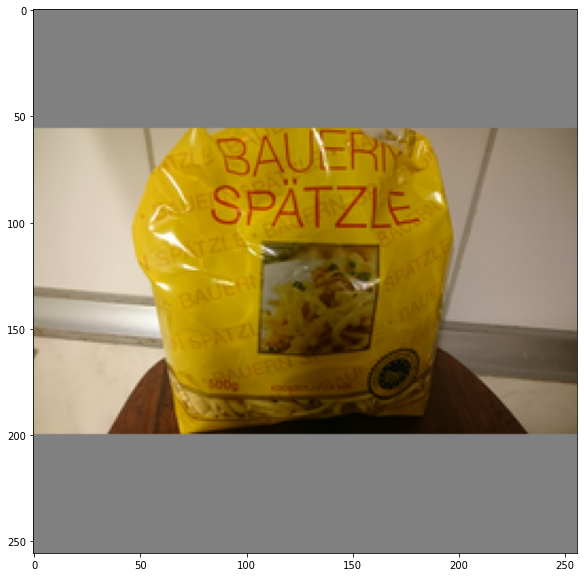

In [13]:
plt.figure(figsize=(24,10))
plt.imshow(cv2.cvtColor(image_matrix,cv2.COLOR_RGB2BGR))

# ImageDataGenerator >> Data Augmentation

### base_dir
### train_dir
### Class1
### Class2

### test_dir
### class1
### class2

In [15]:
def directory_system_generator(source_directory, sink_directory):
  train_path, test_path = os.path.join(sink_directory, 'train'), os.path.join(sink_directory, 'test')

  classes = os.listdir(source_directory)

  train_classes_path = [os.path.join(train_path, class_) for class_ in classes]
  test_classes_path = [os.path.join(test_path, class_) for class_ in classes]

  print('Working on the Training Directories')
  try:
    list(map(os.makedirs, train_classes_path))
  except Exception as e:
    print('Directory already exists')
  
  print('Working on the Testing directories')
  try:
    list(map(os.makedirs, test_classes_path))
  except Exception as e:
    print('Directory already exists')

  print('*'*114)
  print('Sucessfull')

  return train_path, test_path, classes

In [16]:
image_folder_path = os.path.join(extraction_point,'images')

train_path, test_path, classes = directory_system_generator(source_directory = image_folder_path, sink_directory = processed_data_path)

Working on the Training Directories
Working on the Testing directories
******************************************************************************************************************
Sucessfull


In [18]:
source_directory = image_folder_path

for class_ in sorted(classes):
  print(f'total images in {class_} class: {len(os.listdir(os.path.join(source_directory,class_)))}')

total images in BEANS class: 136
total images in CAKE class: 161
total images in CANDY class: 372
total images in CEREAL class: 278
total images in CHIPS class: 181
total images in CHOCOLATE class: 307
total images in COFFEE class: 298
total images in CORN class: 97
total images in FISH class: 110
total images in FLOUR class: 109
total images in HONEY class: 185
total images in JAM class: 241
total images in JUICE class: 302
total images in MILK class: 162
total images in NUTS class: 168
total images in OIL class: 143
total images in PASTA class: 172
total images in RICE class: 150
total images in SODA class: 177
total images in SPICES class: 207
total images in SUGAR class: 118
total images in TEA class: 283
total images in TOMATO_SAUCE class: 171
total images in VINEGAR class: 157
total images in WATER class: 262


In [19]:
def file_mover(source_directory, sink_directory, classes, test_size = 0.2, random_state = 64, format = '.png'):
  for class_name in classes:
    print(f'working on {class_name} class')

    class_src_path = os.path.join(source_directory, class_name)
    all_images = [i for i in os.listdir(class_src_path) if  i.endswith(format)]
    print(f'total images found : {len(all_images)}')

    all_images = pd.Series(all_images) 
    train, test = train_test_split(all_images, test_size =test_size, random_state = random_state )

    train_source_paths = [os.path.join(class_src_path,file_path) for file_path in train]
    training_data_sink = os.path.join(sink_directory, 'train',class_name)
    print(f'Training data sink path : {training_data_sink}')
    train_sink_path = [os.path.join(training_data_sink, file_path) for file_path in train]

    test_source_paths = [os.path.join(class_src_path,file_path) for file_path in test]
    testing_data_sink = os.path.join(sink_directory, 'test',class_name)
    print(f'Testing data sink path : {testing_data_sink}')
    test_sink_path = [os.path.join(testing_data_sink, file_path) for file_path in test]

    list(map(move, train_source_paths, train_sink_path ))
    list(map(move, test_source_paths, test_sink_path ))
    
    print(f'all files moved from {class_name} class')
    print('*'*114)

  print('Sucessfull')



In [20]:
file_mover(source_directory = image_folder_path, sink_directory = processed_data_path, classes = classes )

working on SPICES class
total images found : 207
Training data sink path : /content/data/processed/train/SPICES
Testing data sink path : /content/data/processed/test/SPICES
all files moved from SPICES class
******************************************************************************************************************
working on NUTS class
total images found : 168
Training data sink path : /content/data/processed/train/NUTS
Testing data sink path : /content/data/processed/test/NUTS
all files moved from NUTS class
******************************************************************************************************************
working on CAKE class
total images found : 161
Training data sink path : /content/data/processed/train/CAKE
Testing data sink path : /content/data/processed/test/CAKE
all files moved from CAKE class
******************************************************************************************************************
working on SUGAR class
total images found : 118
Tr

# Model Building

In [26]:
# Processing and generating the train data
train_data_generator = ImageDataGenerator(rescale = 1/255,
                                          zoom_range = 0.3,
                                          height_shift_range = 0.2,
                                          width_shift_range = 0.2,
                                          shear_range = 0.2,
                                          vertical_flip = True,
                                          horizontal_flip = True,
                                          fill_mode = 'nearest')
train_data = train_data_generator.flow_from_directory(directory = train_path,
                                                      target_size = (256,256),
                                                      batch_size = 64,
                                                      classes = classes,
                                                      class_mode = 'categorical',
                                                      seed = 64)

# Processing and generating the test data
test_data_generator = ImageDataGenerator(rescale = 1/255,
                                          zoom_range = 0.3,
                                          height_shift_range = 0.2,
                                          width_shift_range = 0.2,
                                          shear_range = 0.2,
                                          vertical_flip = True,
                                          horizontal_flip = True,
                                          fill_mode = 'nearest')
test_data = test_data_generator.flow_from_directory(directory = test_path,
                                                      target_size = (256,256),
                                                      batch_size = 64,
                                                      classes = classes,
                                                      class_mode = 'categorical',
                                                      seed = 64)

Found 3945 images belonging to 25 classes.
Found 1002 images belonging to 25 classes.


# CNN

In [29]:
#-------------Building the structure------
cnn = tf.keras.Sequential()

# Adding the input layer
cnn.add(tf.keras.layers.Input(shape = (256,256,3)))

# Adding the first conv-pooling layers
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same'))

# Adding the Second conv-pooling layers
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same'))

# Adding the third conv-pooling layers
cnn.add(tf.keras.layers.Conv2D(filters = 100, kernel_size = 3, padding = 'same' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same'))

# Flattening the features
cnn.add(tf.keras.layers.Flatten())

# Adding the ANN
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(tf.keras.layers.Dense(units = 300, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(tf.keras.layers.Dense(units = len(classes), activation = 'softmax', kernel_initializer = 'glorot_normal'))

# Compiling the model
cnn.compile(optimizer = 'Adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy','Precision','Recall'])

In [30]:
# Summarizing the model
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 100)       57700     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 100)     

In [ ]:
cnn_his_obj = cnn.fit_generator(generator = train_data,
                      validation_data = test_data,
                      epochs = 50,
                      use_multiprocessing = True,
                      workers = 20)

<ipython-input-32-526d5813f844>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_his_obj = cnn.fit_generator(generator = train_data,


Epoch 1/50
62/62 [==============================] - 133s 2s/step - loss: 4.0948 - accuracy: 0.0885 - precision: 0.0585 - recall: 0.0071 - val_loss: 3.0237 - val_accuracy: 0.1048 - val_precision: 0.1818 - val_recall: 0.0040
Epoch 2/50
62/62 [==============================] - ETA: 0s - loss: 2.9204 - accuracy: 0.1503 - precision: 0.4405 - recall: 0.0094